# Clasificación de idiomas Inglés vs Holandes

**Presentado por:**

**Pablo Sanchez Bernal**

**Rafael Sanchez Oviedo**


Antes de poder hablar del problema, debemos dar un pequeño contexto acerca de que se trata esta implementación.

Es importante saber ¿Qué es la clasificación de texto?

La clasificación de texto mediante Machine Learning es una técnica que automatiza la categorización de texto abierto en diversas categorías predefinidas. Dado que el 80-90% de los datos empresariales son no estructurados y su volumen crece más rápido que los datos estructurados, la clasificación automática se vuelve crucial. Tradicionalmente, procesar estos datos se hacía manualmente, pero esto es costoso y consume mucho tiempo. Las herramientas automatizadas de clasificación de texto, que combinan Procesamiento de Lenguaje Natural (NLP) y Machine Learning, permiten estructurar y analizar grandes cantidades de texto de manera eficiente. Esto posibilita clasificar artículos, organizar solicitudes de apoyo y evaluar el sentimiento de la marca a través del análisis del tono en las redes sociales.

La clasificación de texto es crucial para optimizar el aprovechamiento de datos no estructurados en las empresas. Facilita la organización eficiente y rentable de diversos tipos de textos, como correos electrónicos, documentos legales, anuncios y bases de datos. Este enfoque ahorra tiempo y permite la toma de decisiones fundamentadas basadas en datos pertinentes.

### Sistemas de aprendizaje automático

La clasificación de texto mediante Machine Learning implica la creación de clasificaciones basadas en observaciones previas en lugar de depender de reglas establecidas por humanos. Los algoritmos de aprendizaje automático comprenden las diversas correlaciones entre fragmentos de texto y anticipan salidas específicas (etiquetas) para entradas particulares mediante el uso de datos de entrenamiento (texto). Al emplear el término "etiqueta" en este contexto, nos referimos a un grupo o categoría definida en la que se puede clasificar cualquier texto. Este enfoque permite que el sistema aprenda y mejore su capacidad de clasificación a medida que se le proporciona más información y datos de entrenamiento.



### Problemática

El conjunto de datos se centra en la clasificación de texto, específicamente en la identificación del idioma (inglés o neerlandés) en el que están escritas alrededor de 15 palabras en segmentos. Este problema de clasificación de lenguaje puede abordarse construyendo un sistema simple de clasificación de texto.



### Fuentes de Datos

El conjunto de datos consta de más de 1000 ejemplos, cada uno con segmentos de alrededor de 15 palabras. Cada ejemplo está etiquetado con una clase que especifica si las palabras están escritas en inglés ("en") o neerlandés ("nl"). La información fue recopilada mediante la copia de segmentos aleatorios de artículos de Wikipedia, y se utilizó un script de Python para modificar la extracción y crear casos de prueba deseados.



### Variables

1.   Identificador de clase: "en" y "nl", se encargan de indicar en qué idioma se encuentran las frases.
2.   Segmento de texto: Consta de alrededor de 15 palabras en el idioma correspondiente a la clase.

### Estructura del Conjunto de Datos

1.   Hay 1070 registros de datos, cada uno separado por caracteres "\n".
2.   Cada registro comienza con un código de clase de dos letras seguido por el carácter "|" y alrededor de 15 palabras escritas en inglés o neerlandés.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Reconocimiento de los datos

A continuación mostramos una vista previa de algunos de las frases y contamos la cantidad de registros que hay en el data-set. Cabe señalar que en el documento de texto del dataset se le agregó una primera linea:

lang|text

que serviran como cabeceras de sus respectivas columnas (la columna de la etiqueta del idioma y la columna del texto)

In [2]:
file_path = '/content/train_new_mod.txt'

df = pd.read_csv(file_path, sep='|')

print('Numero de registros: ' + str(df.shape[0]))

df.head(5)

Numero de registros: 1069


,lang,text
0,en,"host with After to rugby test World system, th..."
1,en,"and Africa in permission winners,[25] of in ye..."
2,en,President tournament wearing presenting were m...
3,en,The the are 'The thirty-eight reference as Ell...
4,en,a The Rugby In and Warrant head 'The Webb and ...


A continuación utilizamos un countplot con el fin de visualizar la distribución del conjunto de datos, lo que nos permitió revelar que hay una distribución homogénea entre las clases.


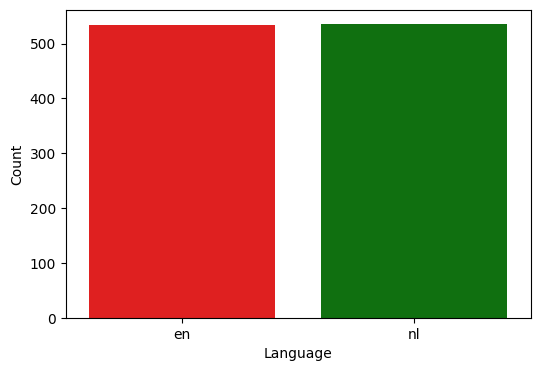

Numero de registros por idioma


lang
en    534
nl    535
Name: text, dtype: int64

In [3]:
# Establecer el tamaño de la figura
plt.figure(figsize=(6, 4))

# Crear un countplot con las categorías "en" y "nl" de diferentes colores
sns.countplot(data=df, x='lang', palette={'en': 'red', 'nl': 'green'})

# Configurar los ejes y etiquetas
plt.xlabel('Language')
plt.ylabel('Count')

# Mostrar el gráfico
plt.show()

print('Numero de registros por idioma')
df.groupby(['lang'])['text'].count()

A continuación, en esta parte procedemos a definir la función limpiar_tokenizar, que limpiará y tokenizara el texto. Ademas de eliminar numeros y signos de puntuación, esta función también eliminará los tokens que no esten escritos en alfabeto latino (caracteres chinos o arabes). Los tokens que no contengan vocales tambien serán eliminados.

Una vez hecho lo anterior, procedemos a tokenizar el conjunto de datos en aras de:

*   Facilitar el análisis.
*   Reducir dimensionalidad.
*   Análisis de frecuencia.
*   Vectorizar el conjunto de datos.


In [4]:
def not_latin(token):
  latin_pattern = re.compile(r'[a-zA-Z]')
  return len(latin_pattern.findall(token)) == 0

def no_vowels(token):
  vowels = re.compile(r'[aeiouAEIOU]')
  return len(vowels.findall(token)) == 0

def limpiar_tokenizar(texto):
  nuevo_texto = texto.lower()
  # Eliminación de signos de puntuación
  regex = '[\\!\\"\\#\\$\\%\\&\\\'\\(\\)\\*\\+\\,\\-\\.\\/\\:\\;\\<\\=\\>\\?\\@\\[\\\\\\]\\^_\\`\\{\\|\\}\\~]'
  nuevo_texto = re.sub(regex , ' ', nuevo_texto)
  # Eliminación de números
  nuevo_texto = re.sub("\d+", ' ', nuevo_texto)
  # Eliminación de espacios en blanco múltiples
  nuevo_texto = re.sub("\\s+", ' ', nuevo_texto)
  # Tokenización por palabras individuales
  nuevo_texto = nuevo_texto.split(sep = ' ')
  # Eliminación de tokens que no contengan vocales o que esten en alfabetos no latinos (caracteres chinos a arabes, por ejemplo)
  nuevo_texto = [token for token in nuevo_texto if (not no_vowels(token)) and (not not_latin(token))]

  return(nuevo_texto)

test = "overzicht Europees laatste tegen was voor vond officiÃ«le in De 2012, op van"
print(test)
print(limpiar_tokenizar(texto=test))

overzicht Europees laatste tegen was voor vond officiÃ«le in De 2012, op van
['overzicht', 'europees', 'laatste', 'tegen', 'was', 'voor', 'vond', 'officiã«le', 'in', 'de', 'op', 'van']


In [5]:
df['tokenized_text'] = df['text'].apply(lambda x: limpiar_tokenizar(x))
df.head(10)

,lang,text,tokenized_text
0,en,"host with After to rugby test World system, th...","[host, with, after, to, rugby, test, world, sy..."
1,en,"and Africa in permission winners,[25] of in ye...","[and, africa, in, permission, winners, of, in,..."
2,en,President tournament wearing presenting were m...,"[president, tournament, wearing, presenting, w..."
3,en,The the are 'The thirty-eight reference as Ell...,"[the, the, are, the, thirty, eight, reference,..."
4,en,a The Rugby In and Warrant head 'The Webb and ...,"[a, the, rugby, in, and, warrant, head, the, w..."
5,en,an high - The game engraved Crown Football two...,"[an, high, the, game, engraved, crown, footbal..."
6,en,a face restored a is Ellis the Lyte.[34][35] p...,"[a, face, restored, a, is, ellis, the, lyte, p..."
7,en,"from the political an 1770, the New by crown a...","[from, the, political, an, the, new, crown, an..."
8,en,maintained On as initially eastern transportat...,"[maintained, on, as, initially, eastern, trans..."
9,en,functions a colony Wales the self-governing si...,"[functions, a, colony, wales, the, self, gover..."


Adicionalmente,  transformamos el DataFrame anidado en un formato tidy, donde cada token individual de la columna 'tokenized_text' se coloca en filas separadas. Esto, buscando facilitar el análisis y la manipulación de datos.

Luego imprimimos una vista previa de las primeras 20 líneas.

In [6]:
df_tidy = df.explode(column='tokenized_text')
df_tidy = df_tidy.drop(columns='text')
df_tidy = df_tidy.rename(columns={'tokenized_text':'token'})
df_tidy = df_tidy.reset_index()
df_tidy.head(20)

,index,lang,token
0,0,en,host
1,0,en,with
2,0,en,after
3,0,en,to
4,0,en,rugby
5,0,en,test
6,0,en,world
7,0,en,system
8,0,en,the
9,0,en,australia


# Análisis de frecuencia

 Realizamos un análisis de frecuencia en los datos tokenizados para cada idioma ('lang'), identificando los 10 tokens más frecuentes para posteriormente mostrar el resultado en un formato tidy, donde cada fila representa un token con su frecuencia y el idioma al que pertenece.

In [7]:
# Top 10 palabras más utilizadas en cada idioma
# ==============================================================================
df_tidy.groupby(['lang','token'])['token'] \
 .count() \
 .reset_index(name='count') \
 .groupby('lang') \
 .apply(lambda x: x.sort_values('count', ascending=False).head(10))

lang token  count
lang                       
en   2493   en   the    616
     1741   en    of    288
     113    en   and    262
     1200   en    in    226
     0      en     a    185
     2528   en    to    138
     1282   en    is    112
     2679   en   was    104
     168    en    as     89
     955    en   for     68
nl   3267   nl    de    589
     5125   nl   van    307
     3851   nl    in    280
     3770   nl   het    240
     3389   nl   een    217
     3425   nl    en    203
     3893   nl    is    141
     5284   nl  voor    102
     4452   nl    op     94
     5464   nl  zijn     91

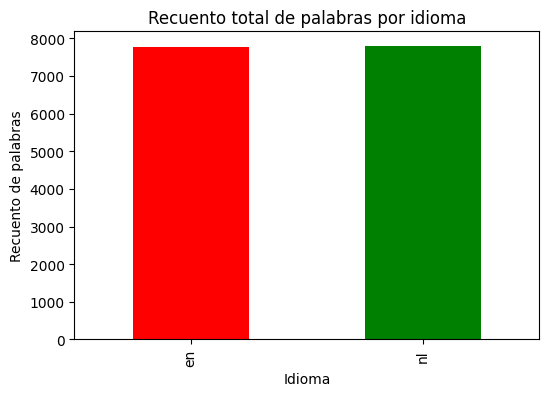

--------------------------
Palabras totales por idioma 👇
--------------------------


lang
en    7763
nl    7790
Name: token, dtype: int64

In [8]:
#@title Recuento total de palabras por idioma
word_count = df_tidy.groupby('lang')['token'].count()

# Crear la tabla gráfica
fig, ax = plt.subplots(figsize=(6, 4))
colors = ['red', 'green']  # Colores para las categorías 'en' y 'nl'
word_count.plot(kind='bar', ax=ax, color=colors)
ax.set_xlabel('Idioma')
ax.set_ylabel('Recuento de palabras')
ax.set_title('Recuento total de palabras por idioma')

# Mostrar la tabla gráfica
plt.show()

print('--------------------------')
print('Palabras totales por idioma 👇')
print('--------------------------')
df_tidy.groupby(by='lang')['token'].count()

In [9]:
# Palabras distintas utilizadas
# ==============================================================================
print('----------------------------')
print('Palabras distintas por idioma')
print('----------------------------')
df_tidy.groupby(by='lang')['token'].nunique()

----------------------------
Palabras distintas por idioma
----------------------------


lang
en    2778
nl    2729
Name: token, dtype: int64

In [10]:
# Número de palabras comunes entre idiomas
# ==============================================================================
palabras_en = set(df_tidy[df_tidy.lang == 'en']['token'])
palabras_nl = set(df_tidy[df_tidy.lang == 'nl']['token'])

print(f"Palabras comunes entre los dos idiomas: {len(palabras_en.intersection(palabras_nl))}")

Palabras comunes entre los dos idiomas: 159


**Comparación en el uso de palabras**

En el DataFrame mostrado:

**en y nl:** La probabilidad estimada de que la palabra aparezca en la categoría en y nl

**log_odds:** El logaritmo de la razón de probabilidades (log odds ratio) de la palabra entre las categorías "en" y "nl".

**abs_log_odds:** Este valor representa la magnitud de la diferencia en la probabilidad de la palabra entre las categorías.

**idioma frecuente:** La categoría en la que la palabra es más frecuente según el log odds ratio. "en" indica que la palabra es más frecuente en el idioma inglés, y nl indica que es más frecuente en el idioma neerlandés.

Los valores positivos indican una asociación más fuerte con el idioma inglés, mientras que los valores negativos indican una asociación más fuerte con el idioma neerlandés.

Una forma de hacer este análisis es mediante el log of odds ratio de las frecuencias. Esta comparación se hace por pares, en este caso se comparan en y nl.

In [11]:
# Cálculo del log of odds ratio de cada palabra (en vs nl)
# ==============================================================================
# Pivotaje y despivotaje
df_pivot = df_tidy.groupby(["lang","token"])["token"] \
                .agg(["count"]).reset_index() \
                .pivot(index = "token" , columns="lang", values= "count")

df_pivot = df_pivot.fillna(value=0)
df_pivot.columns.name = None

df_unpivot = df_pivot.melt(value_name='n', var_name='lang', ignore_index=False)
df_unpivot = df_unpivot.reset_index()

# Selección de los idiomas en y nl
df_unpivot = df_unpivot[df_unpivot.lang.isin(['en', 'nl'])]

# Se añade el total de palabras de cada idioma
df_unpivot = df_unpivot.merge(
                    df_tidy.groupby('lang')['token'].count().rename('N'),
                    how = 'left',
                    on  = 'lang'
                 )

# Cálculo de odds y log of odds de cada palabra
df_logOdds = df_unpivot.copy()
df_logOdds['odds'] = (df_logOdds.n + 1) / (df_logOdds.N + 1)
df_logOdds = df_logOdds[['token', 'lang', 'odds']] \
                    .pivot(index='token', columns='lang', values='odds')
df_logOdds.columns.name = None

df_logOdds['log_odds']     = np.log(df_logOdds.en/df_logOdds.nl)
df_logOdds['abs_log_odds'] = np.abs(df_logOdds.log_odds)

# Si el logaritmo de odds es mayor que cero, significa que es una palabra con
# mayor probabilidad de pertenecer al ingles. Esto es así porque el ratio sea ha
# calculado como en/nl.
df_logOdds['idioma_frecuente'] = np.where(df_logOdds.log_odds > 0,
                                              "en",
                                              "nl"
                                    )

In [12]:
print('-----------------------------------')
print('Top 10 palabras más diferenciadoras')
print('-----------------------------------')
df_logOdds.sort_values('abs_log_odds', ascending=False).head(10)

-----------------------------------
Top 10 palabras más diferenciadoras
-----------------------------------


,en,nl,log_odds,abs_log_odds,idioma_frecuente
token,,,,,
het,0.000129,0.030933,-5.481325,5.481325,nl
een,0.000129,0.027981,-5.381024,5.381024,nl
van,0.000258,0.039533,-5.033481,5.033481,nl
to,0.017903,0.000128,4.937945,4.937945,en
voor,0.000129,0.013220,-4.631257,4.631257,nl
en,0.000258,0.026184,-4.621501,4.621501,nl
op,0.000129,0.012194,-4.550405,4.550405,nl
zijn,0.000129,0.011808,-4.518317,4.518317,nl
as,0.011592,0.000128,4.503281,4.503281,en


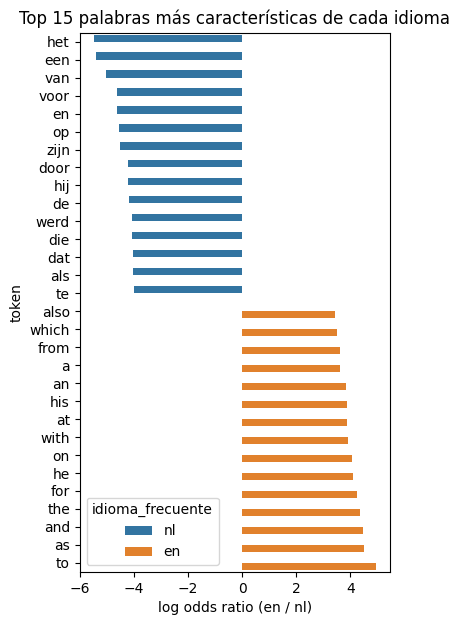

In [13]:
# Top 15 palabras más características de cada idioma
# ==============================================================================

top_30 = df_logOdds[['log_odds', 'abs_log_odds', 'idioma_frecuente']] \
        .groupby('idioma_frecuente') \
        .apply(lambda x: x.nlargest(15, columns='abs_log_odds').reset_index()) \
        .reset_index(drop=True) \
        .sort_values('log_odds')

f, ax = plt.subplots(figsize=(4, 7))
sns.barplot(
    x    = 'log_odds',
    y    = 'token',
    hue  = 'idioma_frecuente',
    data = top_30,
    ax   = ax
)
ax.set_title('Top 15 palabras más características de cada idioma')
ax.set_xlabel('log odds ratio (en / nl)');

Las palabras señaladas en el grafico de arriba tendrán mucho peso a la hora de clasificar los idiomas. Podemos ver que practicamente todas estas palabras son stopwords de sus respectivos idiomas. Ademas, muchas de estas palabras tambien aparecen en el top 10 de palabras mas utilizadas en cada idioma.

## **Frecuencia de los terminos y Fecuencia Inversa del Documento**

Permite calcular la frecuencia relativa de cada término en el texto mediante el cálculo del Term Frequency (tf).

In [14]:
# Cálculo term-frecuency (tf)
# ==============================================================================
tf = df_tidy.copy()
# Número de veces que aparece cada término en cada registro
tf = tf.groupby(["index", "token"])["token"].agg(["count"]).reset_index()
# Se añade una columna con el total de términos por registro
tf['total_count'] = tf.groupby('index')['count'].transform(sum)
# Se calcula el tf
tf['tf'] = tf["count"] / tf["total_count"]
tf.sort_values(by = "tf").head(5)

,index,token,count,total_count,tf
8841,665,zus,1,26,0.038462
8839,665,voorzien,1,26,0.038462
8837,665,vader,1,26,0.038462
8836,665,overleden,1,26,0.038462
8835,665,nickleby,1,26,0.038462


Se calcula el IDF para cada término en el conjunto de texto, lo cual es útil para determinar la importancia relativa de cada término.

In [15]:
# Inverse document frequency
# ==============================================================================
idf = df_tidy.copy()
total_documents = idf["index"].drop_duplicates().count()
# Número de documentos (registros) en los que aparece cada término
idf = idf.groupby(["token", "index"])["token"].agg(["count"]).reset_index()
idf['n_documentos'] = idf.groupby('token')['count'].transform(sum)
# Cálculo del idf
idf['idf'] = np.log(total_documents / idf['n_documentos'])
idf = idf[["token","n_documentos", "idf"]].drop_duplicates()
idf.sort_values(by="idf").head(5)

,token,n_documentos,idf
11467,the,623,0.539932
2630,de,597,0.582562
5981,in,506,0.747942
8717,of,313,1.228276
12532,van,308,1.244379


En esta tabla podemos observar el número de registros en los que aparece cada palabra.

Term Frequency - Inverse Document Frequency:

La razón principal para realizar este cálculo es identificar los términos más relevantes y distintivos en un conjunto de documentos.

## **Creación de la matriz tf-idf**

In [16]:
# Term Frequency - Inverse Document Frequency
# ==============================================================================
tf_idf = pd.merge(left=tf, right=idf, on="token")
tf_idf["tf_idf"] = tf_idf["tf"] * tf_idf["idf"]
tf_idf.sort_values(by="index").head(5)

,index,token,count,total_count,tf,n_documentos,idf,tf_idf
0,0,after,1,14,0.071429,13,4.409530,0.314966
533,0,with,1,14,0.071429,49,3.082659,0.220190
580,0,world,1,14,0.071429,20,3.978747,0.284196
600,0,zealand,1,14,0.071429,1,6.974479,0.498177
53,0,the,1,14,0.071429,623,0.539932,0.038567


# **Train-Test**

En todo proceso de aprendizaje estadístico es recomendable repartir las observaciones en un set de entrenamiento y otro de test. Esto permite evaluar la capacidad del modelo. Para este ejercicio se selecciona como test un 20% aleatorio de los registros.

In [17]:
# Reparto train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

datos_X = df['text']
datos_y = df['lang']

X_train, X_test, y_train, y_test = train_test_split(
    datos_X,
    datos_y,
    test_size = 0.2,
    random_state = 123

)


Es importante verificar que la proporción de cada grupo es similar en el set de entrenamiento y en el de test.

In [18]:
value, counts = np.unique(y_train, return_counts=True)
print('Proporción en el grupo de entrenamiento:')
print(dict(zip(value, 100 * counts / sum(counts))))
value, counts = np.unique(y_test, return_counts=True)
print('Proporción en el grupo de prueba:')
print(dict(zip(value, 100 * counts / sum(counts))))

Proporción en el grupo de entrenamiento:
{'en': 49.473684210526315, 'nl': 50.526315789473685}
Proporción en el grupo de prueba:
{'en': 51.86915887850467, 'nl': 48.13084112149533}


# **Vectorización tf-idf**

Empleando los registros de entrenamiento se crea un matriz tf-idf en la que cada columna es un término (palabra), cada fila un documento (registro) y el valor de intersección el tf-idf correspondiente. Para facilitar la obtención de la matriz TF-IDF se recurre a la clase TfidVectorized de Scikit-Learn pero, en lugar de utilizar el tokenizador por defecto, se emplea la función definida en los apartados anteriores (limpiar_tokenizar()).

También notese que en el parametro stop_words le decimos al vectorizador que no elimine ninguna stopword, ya que estas son muy importantes a la hora de discriminar entre idiomas.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creación de la matriz tf-idf
# ==============================================================================
tfidf_vectorizador = TfidfVectorizer(
                        tokenizer  = limpiar_tokenizar,
                        min_df     = 3,
                        stop_words = None
                    )
tfidf_vectorizador.fit(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


TfidfVectorizer(min_df=3,
                tokenizer=<function limpiar_tokenizar at 0x7ad612d16320>)

A la hora de transformar los documentos de test, hay que proyectarlos en la misma matriz obtenida previamente con los documentos de entrenamiento. Esto es importante ya que, si en los documentos de test hay algún término que no aparece en los de entrenamiento o viceversa, las dimensiones de cada matriz no coinciden.

In [20]:
vect_Xtrain = tfidf_vectorizador.transform(X_train)
vect_Xtest  = tfidf_vectorizador.transform(X_test)

In [21]:
print(f" Número de tokens creados: {len(tfidf_vectorizador.get_feature_names_out())}")
print(tfidf_vectorizador.get_feature_names_out()[:10])

 Número de tokens creados: 621
['a' 'aan' 'aarde' 'about' 'act' 'administration' 'af' 'africa' 'african'
 'after']


In [22]:
print("Conjunto de entrenamiento - Características:", vect_Xtrain.shape)
print("Conjunto de entrenamiento - Etiquetas:", y_train.shape)
print("Conjunto de prueba - Características:", vect_Xtest.shape)
print("Conjunto de prueba - Etiquetas:", y_test.shape)

Conjunto de entrenamiento - Características: (855, 621)
Conjunto de entrenamiento - Etiquetas: (855,)
Conjunto de prueba - Características: (214, 621)
Conjunto de prueba - Etiquetas: (214,)


# **Funciones de selección de caracteristicas**
La función cuasiConstantes() toma matrices de entrenamiento y prueba, aplicando la eliminación de características cuasi-constantes utilizando VarianceThreshold, la cual es una clase en la biblioteca scikit-learn que se utiliza para realizar la selección de características basada en la varianza, eliminando las características que tienen muy poca varianza. Luego, devuelve las matrices de entrenamiento y prueba después de la eliminación, junto con los índices de las características seleccionadas.

Adicionalmente, implementamos una función llamada ScaracteristicasRandom() que utiliza Recursive Feature Elimination (RFE) en combinación con un clasificador Random Forest para seleccionar y clasificar características.

La idea principal detrás de RFE es ajustar repetidamente un modelo y eliminar las características menos importantes hasta que se alcance el número deseado de características o hasta que no haya más características para eliminar.

In [23]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.datasets import make_classification

def cuasiConstantes(Xtrain, Xtest, threshold=0.005):
    # Crear el objeto VarianceThreshold
    selector = VarianceThreshold(threshold=threshold)

    # Aplicar la eliminación de características cuasi-constantes en la matriz tf-idf de entrenamiento
    xtrain = selector.fit_transform(Xtrain)

    # Obtener los índices de las características seleccionadas
    selected_feature_indices = selector.get_support(indices=True)

    # Filtrar la matriz tf-idf de prueba utilizando los índices de características seleccionadas
    xtest = selector.transform(Xtest)

    num_selected_features = xtrain.shape[1]
    print("Número de características seleccionadas:", num_selected_features)

    return xtrain, xtest, selected_feature_indices



def ScaracteristicasRandom(xtrain, y_train, n_estimators=100, max_depth=None, min_samples_split=2):
    # Crear un estimador Random Forest con parámetros ajustados
    rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_split=min_samples_split, n_jobs=-1)

    # Crear un selector RFE con Random Forest y ranking
    rfe = RFE(estimator=rf, step=2)

    # Aplicar RFE al conjunto de datos
    xtrainE = rfe.fit_transform(xtrain, y_train)
    # Obtener las características seleccionadas
    selected_features = rfe.support_

    # Obtener el ranking de importancia de características
    feature_ranking = rfe.ranking_

    # Imprimir las características seleccionadas
    print("Características seleccionadas:")
    for i, feature in enumerate(selected_features):
        if feature:
            print(f"Feature {i+1}")

    # Imprimir el ranking de características
    print("Ranking de características :")
    for i, rank in enumerate(feature_ranking):
        print(f"Feature {i+1}: {rank}")

    return xtrainE, selected_features, feature_ranking



In [24]:
#invocamos la función cuasiConstantes()

selected_xtrain, selected_xtest, selected_feature_indices = cuasiConstantes(vect_Xtrain, vect_Xtest)

print(selected_xtrain.shape)
print(selected_xtest.shape)
print(selected_feature_indices)
print([tfidf_vectorizador.get_feature_names_out()[i] for i in selected_feature_indices])

Número de características seleccionadas: 29
(855, 29)
(214, 29)
[  0   1  18  25  40 120 123 134 140 154 162 182 226 233 237 240 251 263
 340 379 395 497 508 518 551 566 575 581 616]
['a', 'aan', 'als', 'and', 'as', 'dat', 'de', 'die', 'door', 'een', 'en', 'for', 'he', 'het', 'hij', 'his', 'in', 'is', 'met', 'of', 'op', 'te', 'the', 'to', 'van', 'voor', 'was', 'werd', 'zijn']


In [25]:
#Invocamos la función ScaracteristicasRandom()
xtrainE, selected_features, feature_ranking = ScaracteristicasRandom(selected_xtrain, y_train)

# Conjunto de prueba transformado
xtestE = selected_xtest[:, selected_features]

Características seleccionadas:
Feature 1
Feature 4
Feature 7
Feature 8
Feature 10
Feature 11
Feature 14
Feature 20
Feature 21
Feature 23
Feature 24
Feature 25
Feature 26
Feature 29
Ranking de características :
Feature 1: 1
Feature 2: 4
Feature 3: 2
Feature 4: 1
Feature 5: 4
Feature 6: 5
Feature 7: 1
Feature 8: 1
Feature 9: 3
Feature 10: 1
Feature 11: 1
Feature 12: 7
Feature 13: 9
Feature 14: 1
Feature 15: 5
Feature 16: 9
Feature 17: 6
Feature 18: 6
Feature 19: 8
Feature 20: 1
Feature 21: 1
Feature 22: 3
Feature 23: 1
Feature 24: 1
Feature 25: 1
Feature 26: 1
Feature 27: 7
Feature 28: 8
Feature 29: 1


In [26]:
# Contar características seleccionadas
num_selected_features = sum(selected_features)
print("Número de características seleccionadas:", num_selected_features)

Número de características seleccionadas: 14


#**METODOS DE APRENDIZAJE DE MÁQUINA**

##**Arboles de Decisión**


###Prueba con parametros por defecto

Imprimimos las dimensiones del conjunto de entrenamiento y prueba, proporcionando información sobre la cantidad de instancias y características en los datos de entrenamiento y prueba, así como la forma de las etiquetas asociadas.

In [41]:
print("Dimensiones entreamiento :", xtrainE.shape)
print("Dimensiones prueba ", xtestE.shape)

Dimensiones entreamiento : (855, 14)
Dimensiones prueba  (214, 14)


A continuacion, entrenamos el modelo de clasificación de arbol de decisión, realizando validación cruzada para evaluar el rendimiento, y luego imprimir la precisión del modelo en los datos de entrenamiento y prueba.

La validación cruzada nos proporciona una evaluación más robusta del rendimiento del modelo al dividir los datos en conjuntos de entrenamiento y prueba en múltiples iteraciones.

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

dt_Model = DecisionTreeClassifier()
cross_val_scores = cross_val_score(dt_Model, xtrainE, y_train, cv=2)
dt_Model.fit(xtrainE, y_train)
# Evaluar el rendimiento del modelo en los datos de entrenamiento y prueba
train_accuracy = dt_Model.score(xtrainE, y_train) * 100
test_accuracy = dt_Model.score(xtestE, y_test) * 100

print("Precisión del entrenamiento:", "{:.3f}%".format(train_accuracy))
print("Precisión de prueba:", "{:.3f}%".format(test_accuracy))

# Imprimir los resultados de la validación cruzada
print("Resultados de la validación cruzada:")
print(cross_val_scores)
print("Precisión media: {:.2f}".format(cross_val_scores.mean()))

Precisión del entrenamiento: 99.181%
Precisión de prueba: 99.065%
Resultados de la validación cruzada:
[0.97663551 0.98126464]
Precisión media: 0.98


###Prueba con Hiperparametros Ajustados:

Definimos la matriz de hiperparámetros para su posteior uso.

In [43]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2,4, 8, 10],
    'min_samples_leaf': [4, 2, 15],
    'max_features': ['auto', 'sqrt', 'log2']
}
print(param_grid)

{'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 4, 8, 10], 'min_samples_leaf': [4, 2, 15], 'max_features': ['auto', 'sqrt', 'log2']}


###Utilización de la función GridSearchCV

In [44]:
from sklearn.model_selection import GridSearchCV

dt_Grid = GridSearchCV(estimator = dt_Model, param_grid = param_grid, cv = 2, verbose=2, n_jobs = -1)

dt_Grid.fit(xtrainE, y_train)

Fitting 2 folds for each of 216 candidates, totalling 432 fits


GridSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [4, 2, 15],
                         'min_samples_split': [2, 4, 8, 10]},
             verbose=2)

Parámetros escogidos:

In [45]:
test_params = dt_Grid.best_params_
test_params

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4}

Se evalua el rendimiento del método con los mejores parametros

In [46]:
# Evaluar el rendimiento del modelo en los datos de entrenamiento y prueba
train_accuracy = dt_Grid.score(xtrainE, y_train) * 100
test_accuracy = dt_Grid.score(xtestE, y_test) * 100

print("Precisión del entrenamiento:", "{:.3f}%".format(train_accuracy))
print("Precisión de prueba:", "{:.3f}%".format(test_accuracy))

Precisión del entrenamiento: 98.363%
Precisión de prueba: 97.196%


### Matriz de Confusión
Una vez calculado el rendimiento, procedemos a dibujar la matriz de confusión para corroborar de manera visual, la infomación arrojado anteriormente.

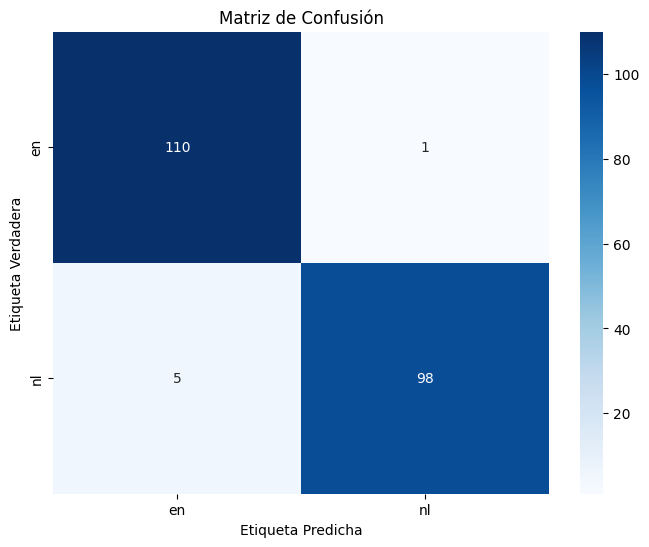

In [51]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
y_pred = dt_Grid.predict(xtestE)
cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y_test)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='d')
plt.title("Matriz de Confusión")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.show()

##**Random Forest**

###Pruebas con parámetros por defecto:

Imprimimos las dimensiones del conjunto de entrenamiento y prueba, proporcionando información sobre la cantidad de instancias y características en los datos de entrenamiento y prueba, así como la forma de las etiquetas asociadas.

In [81]:
print("Dimensiones entreamiento :", xtrainE.shape)
print("Dimensiones prueba ", xtestE.shape)

Dimensiones entreamiento : (855, 14)
Dimensiones prueba  (214, 14)


A continuacion, entrenamos el modelo de clasificación de bosque aleatorio, realizando validación cruzada para evaluar el rendimiento, y luego imprimir la precisión del modelo en los datos de entrenamiento y prueba.

La validación cruzada nos proporciona una evaluación más robusta del rendimiento del modelo al dividir los datos en conjuntos de entrenamiento y prueba en múltiples iteraciones.

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf_Model = RandomForestClassifier()
cross_val_scores = cross_val_score(rf_Model, xtrainE, y_train, cv=2)
rf_Model.fit(xtrainE, y_train)
# Evaluar el rendimiento del modelo en los datos de entrenamiento y prueba
train_accuracy = rf_Model.score(xtrainE, y_train) * 100
test_accuracy = rf_Model.score(xtestE, y_test) * 100

print("Precisión del entrenamiento:", "{:.3f}%".format(train_accuracy))
print("Precisión de prueba:", "{:.3f}%".format(test_accuracy))

# Imprimir los resultados de la validación cruzada
print("Resultados de la validación cruzada:")
print(cross_val_scores)
print("Precisión media: {:.2f}".format(cross_val_scores.mean()))

Precisión del entrenamiento: 99.181%
Precisión de prueba: 98.598%
Resultados de la validación cruzada:
[0.97897196 0.99063232]
Precisión media: 0.98


###Prueba con hiperparámetros ajustados

Definimos la matriz de hiperparámetros para su posteior uso.

In [31]:
# Número de árboles en el bosque aleatorio
n_estimators = [int(x) for x in np.linspace(start=100, stop=500, num=4)]
# Número de características a considerar en cada división
max_features = ['auto', 'sqrt']
# Número máximo de niveles en el árbol
max_depth = None,
# Número mínimo de muestras requeridas para dividir un nodo
min_samples_split = [8, 9,]
# Número mínimo de muestras requeridas en cada nodo hoja
min_samples_leaf = [1, 2]
# Método de selección de muestras para entrenar cada árbol

In [32]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                }
print(param_grid)

{'n_estimators': [100, 233, 366, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': (None,), 'min_samples_split': [8, 9], 'min_samples_leaf': [1, 2]}


###Utilización de la función GridSearchCV

In [33]:
from sklearn.model_selection import GridSearchCV

rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 2, verbose=2, n_jobs = -1)

rf_Grid.fit(xtrainE, y_train)

Fitting 2 folds for each of 32 candidates, totalling 64 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': (None,), 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [8, 9],
                         'n_estimators': [100, 233, 366, 500]},
             verbose=2)

Parámetros escogidos:

In [34]:
test_params = rf_Grid.best_params_
test_params

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 233}

Se evalua el rendimiento del método con los mejores parametros

In [35]:
# Evaluar el rendimiento del modelo en los datos de entrenamiento y prueba
train_accuracy = rf_Grid.score(xtrainE, y_train) * 100
test_accuracy = rf_Grid.score(xtestE, y_test) * 100

print("Precisión del entrenamiento:", "{:.3f}%".format(train_accuracy))
print("Precisión de prueba:", "{:.3f}%".format(test_accuracy))

Precisión del entrenamiento: 99.064%
Precisión de prueba: 98.598%


### Matriz de Confusión
Una vez calculado el rendimiento, procedemos a dibujar la matriz de confusión para corroborar de manera visual, la infomación arrojado anteriormente.

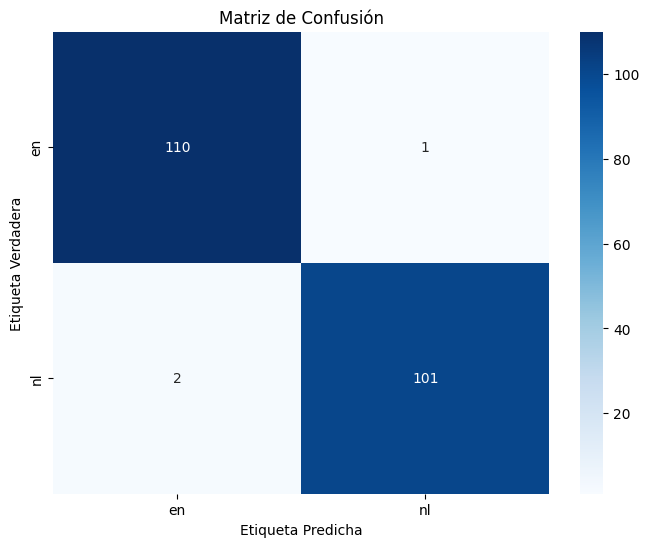

In [50]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
y_pred = rf_Grid.predict(xtestE)
cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y_test)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='d')
plt.title("Matriz de Confusión")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.show()


##**Redes Neuronales**

###Pruebas con parámetros por defecto:

Imprimimos las dimensiones del conjunto de entrenamiento y prueba, proporcionando información sobre la cantidad de instancias y características en los datos de entrenamiento y prueba, así como la forma de las etiquetas asociadas.

In [52]:
print("Dimensiones entreamiento :", xtrainE.shape)
print("Dimensiones prueba ", xtestE.shape)

Dimensiones entreamiento : (855, 14)
Dimensiones prueba  (214, 14)


A continuacion, entrenamos el modelo de clasificación de red neuronal, realizando validación cruzada para evaluar el rendimiento, y luego imprimir la precisión del modelo en los datos de entrenamiento y prueba.

Se debe señalar que aqui hacemos un escalamiento de los datos, lo que resultará en un mejor rendimiento al ajustar los hiperparametros con GridSearchCV.

La validación cruzada nos proporciona una evaluación más robusta del rendimiento del modelo al dividir los datos en conjuntos de entrenamiento y prueba en múltiples iteraciones.

In [55]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)
xtrains = scaler.fit_transform(xtrainE)
xtests = scaler.transform(xtestE)

mlp_Model = MLPClassifier()
cross_val_scores = cross_val_score(mlp_Model, xtrains, y_train, cv=2)
mlp_Model.fit(xtrains, y_train)
# Evaluar el rendimiento del modelo en los datos de entrenamiento y prueba
train_accuracy = mlp_Model.score(xtrains, y_train) * 100
test_accuracy = mlp_Model.score(xtests, y_test) * 100

print("Precisión del entrenamiento:", "{:.3f}%".format(train_accuracy))
print("Precisión de prueba:", "{:.3f}%".format(test_accuracy))

# Imprimir los resultados de la validación cruzada
print("Resultados de la validación cruzada:")
print(cross_val_scores)
print("Precisión media: {:.2f}".format(cross_val_scores.mean()))

Precisión del entrenamiento: 99.064%
Precisión de prueba: 99.533%
Resultados de la validación cruzada:
[0.98831776 0.99063232]
Precisión media: 0.99


###Prueba con hiperparámetros ajustados

Definimos la matriz de hiperparámetros para su posteior uso.

In [67]:
param_grid = {
    'hidden_layer_sizes': [(500),(700,500), (100,100,100)],
    'max_iter': [50,100,200],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01]
}
print(param_grid)

{'hidden_layer_sizes': [500, (700, 500), (100, 100, 100)], 'max_iter': [50, 100, 200], 'activation': ['relu', 'tanh'], 'alpha': [0.0001, 0.001, 0.01]}


###Utilización de la función GridSearchCV

In [68]:
mlp_Grid = GridSearchCV(estimator = mlp_Model, param_grid = param_grid, cv = 2, verbose=2, n_jobs = -1)

mlp_Grid.fit(xtrains, y_train)

Fitting 2 folds for each of 54 candidates, totalling 108 fits


GridSearchCV(cv=2, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [500, (700, 500),
                                                (100, 100, 100)],
                         'max_iter': [50, 100, 200]},
             verbose=2)

Parámetros escogidos:

In [75]:
test_params = mlp_Grid.best_params_
test_params

{'activation': 'relu',
 'alpha': 0.01,
 'hidden_layer_sizes': 500,
 'max_iter': 200}

Se evalua el rendimiento del método con los mejores parametros

In [78]:
# Evaluar el rendimiento del modelo en los datos de entrenamiento y prueba
train_accuracy = mlp_Grid.score(xtrains, y_train) * 100
test_accuracy = mlp_Grid.score(xtests, y_test) * 100

print("Precisión del entrenamiento:", "{:.3f}%".format(train_accuracy))
print("Precisión de prueba:", "{:.3f}%".format(test_accuracy))

Precisión del entrenamiento: 99.064%
Precisión de prueba: 99.533%


### Matriz de Confusión
Una vez calculado el rendimiento, procedemos a dibujar la matriz de confusión para corroborar de manera visual, la infomación arrojado anteriormente.

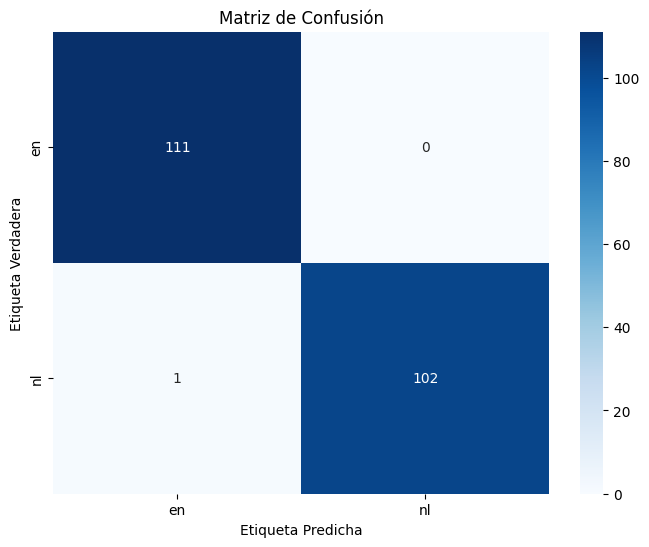

In [80]:
# Calcular la matriz de confusión
y_pred = mlp_Grid.predict(xtests)
cm = confusion_matrix(y_test, y_pred)
labels = np.unique(y_test)
df_cm = pd.DataFrame(cm, index=labels, columns=labels)
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, cmap='Blues', fmt='d')
plt.title("Matriz de Confusión")
plt.xlabel("Etiqueta Predicha")
plt.ylabel("Etiqueta Verdadera")
plt.show()

#**RESULTADOS DE LOS MODELOS**

Lo primero que debemos señalar es que todos los modelos arrojaron precisiones por encima del 90%, tanto en los conjuntos de entrenamiento como en los conjuntos de prueba. Esto indica que todos los modelos quedaron bien entrenados y con una suficiente capacidad de generalizar y de enfrentarse a conjuntos de datos nuevos.

En cuanto a la comparación de los metodos, podemos decir que la red neuronal arrojó los mejores resultados: Tal como se ve en su matriz de confusión, solo 1 de las 214 etiquetas/clases del conjunto de datos de prueba fue predicha erroneamente. Random forest fue el segundo mejor con 3 clases predichas erroneamente. El arbol de decisión fue el peor con 6 clases predichas erroneamente.

Finalmente, y de acuerdo a las matrices de confusión, debe señalarse que todos los tres modelos son ligeramente mejores reconociendo el inglés que reconociendo el neerlandés.